In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**注：除非特别说明，完成以下任务时不要使用numpy或任何其他的库，只使用pandas和matplotlib自带的功能**

In [157]:
# 读取 data/score.xlsx 成绩单
data=pd.read_excel('score.xlsx')
print(data.columns)
print(data.head(10))
# TODO

Index(['学号', '科目', '成绩'], dtype='object')
   学号 科目   成绩
0   4  A   36
1  36  A    0
2  18  A    6
3  59  A    0
4  47  A   65
5  12  A    4
6  58  A   48
7  63  A  100
8   2  A   85
9  65  A    3


In [158]:
# 查看前5行数据
data.head(5)
# TODO

,学号,科目,成绩
0,4,A,36
1,36,A,0
2,18,A,6
3,59,A,0
4,47,A,65


In [159]:
# 计算每门课的人数
data['学号'].count() # 人数
# TODO

352

In [160]:
# 计算每门课的平均分
data.groupby('科目')['成绩'].mean()
# TODO

科目
A    32.742857
B    43.107692
C    43.863014
D    40.360000
E    59.072464
Name: 成绩, dtype: float64

In [161]:
# 计算每门课的分数标准差（自己思考应该使用哪一种计算方式并给出理由）
data.groupby('科目')['成绩'].std()
# TODO

科目
A    34.067999
B    21.568295
C    32.103701
D    27.560077
E    34.352977
Name: 成绩, dtype: float64

In [169]:
# 计算每门课的及格率（分数≥60的人数除以该门课总人数）
#Way1
print(data.groupby('科目')['成绩'].apply(lambda x: x[x>=60].count()/x.count()))

科目
A    0.271429
B    0.200000
C    0.301370
D    0.240000
E    0.492754
Name: 成绩, dtype: float64


In [168]:
#Way2
pass_rates = data[data['成绩']>=60].groupby('科目')['成绩'].count()/data.groupby('科目')['成绩'].count()
print(pass_rates)
# TODO

科目
A    0.271429
B    0.200000
C    0.301370
D    0.240000
E    0.492754
Name: 成绩, dtype: float64


In [179]:
# 计算每个学生的平均分，从高到低排序，显示前10名
data.groupby('学号')['成绩'].mean().sort_values(ascending=False).head(10)
# TODO

     学号 科目   成绩
91    0  B   57
158   0  C   29
282   0  D    0
316   0  E  100


In [182]:
# 将科目A的成绩视为离散随机变量，计算它的熵（可以用numpy的log函数）
p_x = data[data['科目']=='A']['成绩'].to_numpy()/data[data['科目']=='A']['成绩'].count()
entropy = 0
for p in p_x:
    if p !=0: # 遇到p==0要跳过，否则会出现log0会报错
        entropy -= p*np.log(p)
print(entropy)
# TODO

4.901228000822814


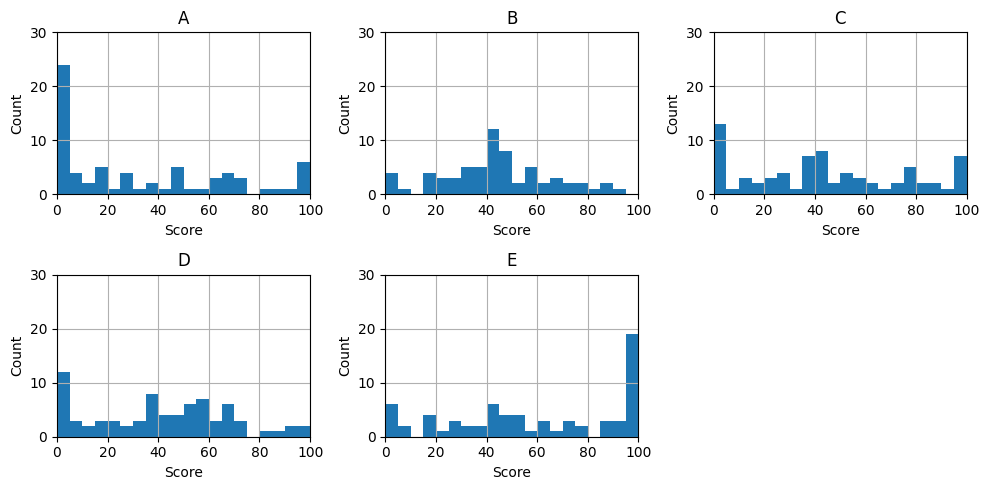

In [183]:
# 绘制每门课的成绩直方图，要求如下
# - 使用子图，布局为2行3列
# - 每个子图的标题为课程名称，x轴标题为"Score"，y轴标题为"Count"
# - 直方图x轴范围是0~100，分成20个柱子；y轴范围是0~30
# - 显示网格
# - 整体尺寸为 高5 宽10
plt.figure(figsize=(10,5))
for i in range(5):
        plt.subplot(2,3,i+1) # 2行3列的图像
        course = data.groupby('科目') # 按科目分组
        plt.hist(course['成绩'].get_group(chr(65+i)),bins=20,range=(0,100)) #chr(65+i)依次对应A,B,C,D,E.get_group()获取对应的成绩
        # bins=20表示分成20个柱子，range=(0,100)表示x轴范围是0~100
        plt.ylim(0,30) # y轴范围是0~30
        plt.xlim(0,100) # x轴范围是0~100
        plt.title(chr(65+i)) # 标题
        plt.xlabel('Score')  # x轴标题
        plt.ylabel('Count') # y轴标题
        plt.grid() # 显示网格
plt.tight_layout() # 自动调整子图参数，使之填充整个图像区域

205
             A           B         C           D           E
A  1235.575610   -0.559756   -91.100   65.990854  -22.729878
B    -0.559756  412.756098   137.575   66.571341 -111.696951
C   -91.100000  137.575000  1093.400   15.475000  191.250000
D    65.990854   66.571341    15.475  701.962195   77.873171
E   -22.729878 -111.696951   191.250   77.873171  989.989024


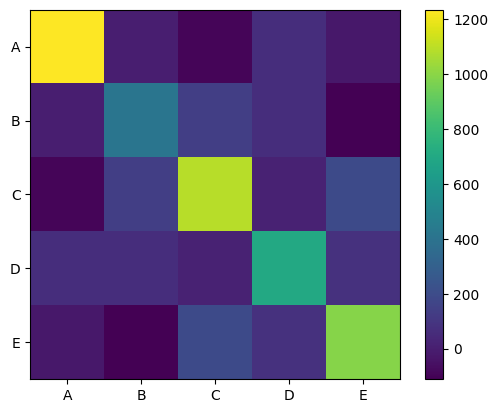

In [197]:
# 筛选出参加了全部科目考试的学生
# 1. 输出学生数目
# 2. 以他们的成绩计算这5门科目的协方差矩阵，print出来
# 3. 使用imshow绘图展示协方差矩阵，在x轴和y轴标记科目名称，显示colorbar
students = data.groupby('学号').filter(lambda x: x['科目'].count()==5) # 筛选出参加了全部科目考试的学生（科目这一项数据有5个）
#输出学生数目
num = students['学号'].count() # 全部科目都参加的学生数目
print(num) 

#以他们的成绩计算这5门科目的协方差矩阵：
courses = students.groupby('科目')['成绩']  # 按科目分组
course_names = list(courses.groups.keys()) #keys()返回字典中的所有键,list()转换为列表用于后面的迭代
course_scores = np.array([courses.get_group(name).to_numpy() for name in course_names]).T #将每门课的成绩转换为numpy数组
#但是上面最开始的转化得到的array是一个5行41列的矩阵，不符合DataFrame的格式，因此需要转置得到41行5列的矩阵
#print(course_scores.shape)
course = pd.DataFrame(course_scores,columns=course_names)
ovMat = course.cov()
print(ovMat)

#使用imshow绘图展示协方差矩阵（？为什么用imshow？）
plt.imshow(ovMat)
plt.xticks((0,1,2,3,4),course_names)
plt.yticks((0,1,2,3,4),course_names)
plt.colorbar()